In [1]:

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [2]:
data = pd.read_csv('cardata.csv')

In [3]:
df = pd.DataFrame(data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.drop('Car_Name', axis=1,inplace=True)


In [5]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
Age = []
for i in df.Year:
    Age.append(i - ((max(df.Year))+1))

In [8]:

df2 = pd.DataFrame({'Age' : np.abs(Age)})


In [9]:
df2.describe()

,Age
count,301.000000
mean,5.372093
std,2.891554
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,16.000000


In [10]:
df.insert(1, 'Age', df2)


In [11]:
df

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,2016,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
df.describe()

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,5.372093,4.661296,7.628472,36947.205980,0.043189
std,2.891554,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,1.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,3.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,5.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,7.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,16.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
df.drop(64, inplace=True)

In [14]:
df.drop(86, inplace=True)

In [15]:
df.drop(196, inplace=True)

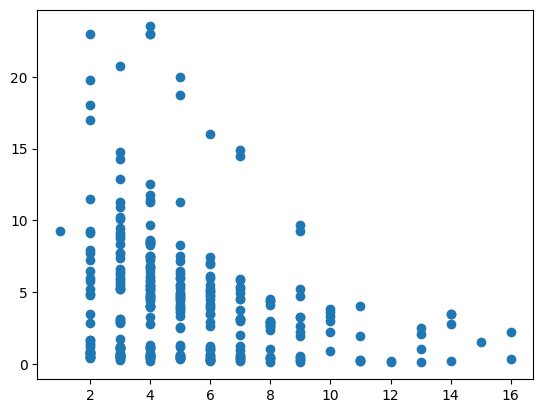

In [16]:
plt.scatter(df.Age, df.Selling_Price)

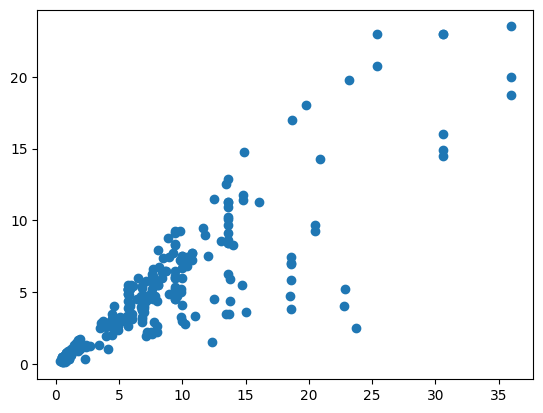

In [17]:
plt.scatter(df.Present_Price, df.Selling_Price)

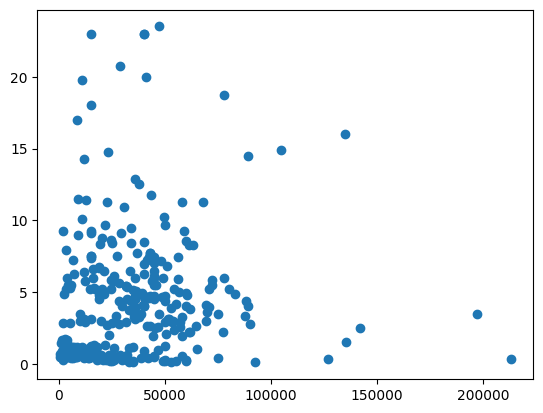

In [18]:
plt.scatter(df.Kms_Driven, df.Selling_Price)

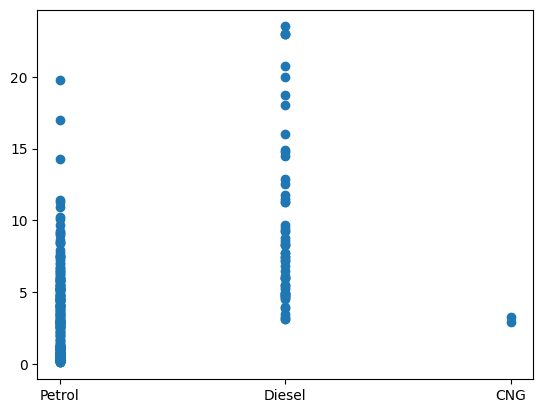

In [19]:
plt.scatter(df.Fuel_Type, df.Selling_Price)

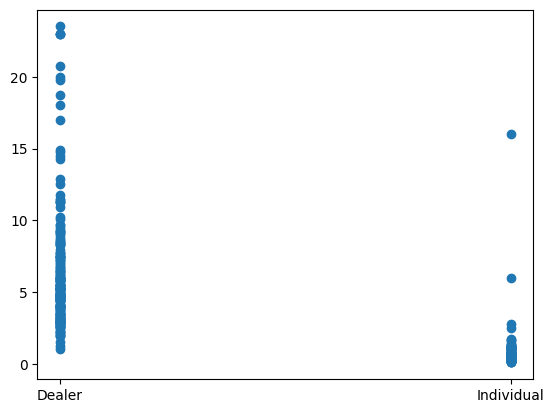

In [20]:
plt.scatter(df.Seller_Type, df.Selling_Price)

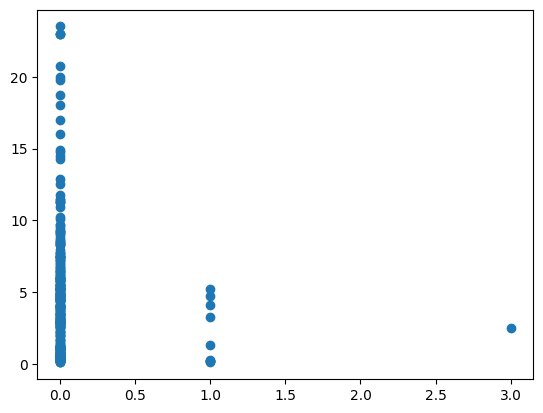

In [21]:
plt.scatter(df.Owner, df.Selling_Price)

In [22]:
df_drop = df[df['Selling_Price']> 25]
df.nlargest(5, columns='Selling_Price')

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
63,2015,4,23.50,35.96,47000,Diesel,Dealer,Automatic,0
51,2015,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0
82,2017,2,23.00,25.39,15000,Diesel,Dealer,Automatic,0
93,2015,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0
96,2016,3,20.75,25.39,29000,Diesel,Dealer,Automatic,0


In [23]:
set(df.Seller_Type)

{'Dealer', 'Individual'}

In [24]:
set(df.Transmission)

{'Automatic', 'Manual'}

In [25]:
set(df.Fuel_Type)

{'CNG', 'Diesel', 'Petrol'}

In [26]:
df.replace('Dealer', 0, inplace=True)

In [27]:
df.replace('Individual', 1, inplace=True)

In [28]:
df.replace('Automatic', 1, inplace=True)

In [29]:
df.replace('Manual', 0, inplace=True)

In [30]:
df.replace('Petrol', 1, inplace=True)

In [31]:
df.replace('Diesel', -1, inplace=True)

In [32]:
df.replace('CNG', 0, inplace=True)

In [33]:
df.drop('Year', axis=1, inplace=True)

In [34]:
# Year2 = df.Year ** 2
# Year3 = df.Year ** 3
Age2 = df.Age ** 2
Age3 = df.Age ** 3
km2 = df.Kms_Driven	 ** 2
km3 = df.Kms_Driven	 ** 3
SinAge = np.sin((2 * np.pi * df.Age) / 12 )
Transmission2 = df.Transmission ** 2
Transmission3 = df.Transmission ** 3
Present_Price2 = df.Present_Price ** 2
Present_Price3 = df.Present_Price ** 3
Fuel_Type3 = df.Fuel_Type ** 3
Fuel_Type5 = df.Fuel_Type ** 5
Owner2 = df.Owner ** 2
Owner3 = df.Owner ** 3




In [35]:



df.insert(1, 'Age2', Age2)
df.insert(2, 'Age3', Age3)


df.insert(7, 'Kms_Driven2', km2)
df.insert(8, 'Kms_Driven3', km3)

df.insert(11, 'Transmission2', Transmission2)
df.insert(12, 'Transmission3', Transmission3)

df.insert(4, 'Present_Price2', Present_Price2)
df.insert(5, 'Present_Price3', Present_Price3)

df.insert(9, 'Fuel_Type3', Fuel_Type3)
# df.insert(10, 'Fuel_Type5', Fuel_Type5)

df.insert(17, 'Owner2', Owner2)
df.insert(18, 'Owner3', Owner3)




In [36]:
df

,Age,Age2,Age3,Selling_Price,Present_Price2,Present_Price3,Present_Price,Kms_Driven,Fuel_Type,Fuel_Type3,Kms_Driven2,Kms_Driven3,Seller_Type,Transmission,Transmission2,Transmission3,Owner,Owner2,Owner3
0,5,25,125,3.35,31.2481,174.676879,5.59,27000,1,1,729000000,19683000000000,0,0,0,0,0,0,0
1,6,36,216,4.75,91.0116,868.250664,9.54,43000,-1,-1,1849000000,79507000000000,0,0,0,0,0,0,0
2,2,4,8,7.25,97.0225,955.671625,9.85,6900,1,1,47610000,328509000000,0,0,0,0,0,0,0
3,8,64,512,2.85,17.2225,71.473375,4.15,5200,1,1,27040000,140608000000,0,0,0,0,0,0,0
4,5,25,125,4.60,47.1969,324.242703,6.87,42450,-1,-1,1802002500,76495006125000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,3,9,27,9.50,134.5600,1560.896000,11.60,33988,-1,-1,1155184144,39262398686272,0,0,0,0,0,0,0
297,4,16,64,4.00,34.8100,205.379000,5.90,60000,1,1,3600000000,216000000000000,0,0,0,0,0,0,0
298,10,100,1000,3.35,121.0000,1331.000000,11.00,87934,1,1,7732388356,679939837696504,0,0,0,0,0,0,0
299,2,4,8,11.50,156.2500,1953.125000,12.50,9000,-1,-1,81000000,729000000000,0,0,0,0,0,0,0


In [37]:
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
normal = scaler.fit_transform(df)
normal_df = pd.DataFrame(normal, columns=['Age', 'Age2', 'Age3', 'Selling_Price', 'Present_Price', 'Present_Price2', 'Present_Price3', 'Kms_Driven', 'Kms_Driven3', 'Kms_Driven2', 'Fuel_Type', 'Fuel_Type3', 'Seller_Type', 'Transmission', 'Transmission2', 'Transmission3', 'Owner', 'Owner2', 'Owner3'])

In [38]:
X = pd.DataFrame(normal_df, columns=['Age', 'Age2', 'Age3', 'Present_Price','Present_Price2', 'Present_Price3', 'Kms_Driven', 'Kms_Driven3', 'Kms_Driven2', 'Fuel_Type', 'Fuel_Type3', 'Seller_Type', 'Transmission', 'Transmission2', 'Transmission3', 'Owner', 'Owner2', 'Owner3'])
y = pd.DataFrame(normal_df.Selling_Price).values.reshape(-1, 1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [40]:
model = LinearRegression()

In [41]:
# comp_Year_scores = np.corrcoef(normal_df.Year, normal_df.Selling_Price)
# comp_Year_scores


In [42]:
# plt.scatter(normal_df.Year, normal_df.Selling_Price)

In [43]:
comp_Age_scores = np.corrcoef(normal_df.Age, normal_df.Selling_Price)
comp_Age_scores


array([[ 1.        , -0.26899032],
       [-0.26899032,  1.        ]])

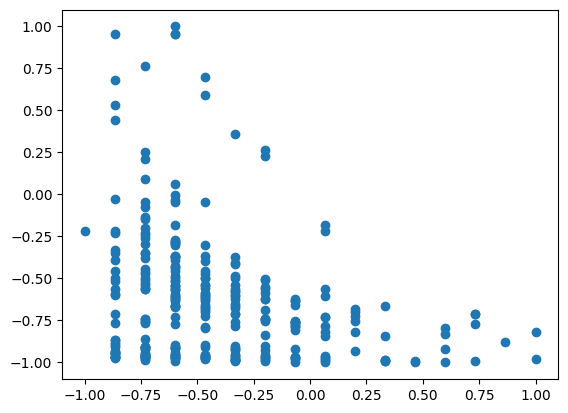

In [44]:
plt.scatter(normal_df.Age, normal_df.Selling_Price)

In [45]:
comp_Present_Price_scores = np.corrcoef(normal_df.Present_Price, normal_df.Selling_Price)
comp_Present_Price_scores


array([[1.        , 0.79549773],
       [0.79549773, 1.        ]])

In [46]:
comp_Kms_Driven_scores = np.corrcoef(normal_df.Kms_Driven, normal_df.Selling_Price)
comp_Kms_Driven_scores


array([[1.        , 0.08923346],
       [0.08923346, 1.        ]])

In [47]:
comp_Fuel_Type_scores = np.corrcoef(normal_df.Fuel_Type, normal_df.Selling_Price)
comp_Fuel_Type_scores


array([[1.        , 0.02008014],
       [0.02008014, 1.        ]])

In [48]:
comp_Seller_Type_scores = np.corrcoef(normal_df.Seller_Type, normal_df.Selling_Price)
comp_Seller_Type_scores

array([[ 1.       , -0.5922211],
       [-0.5922211,  1.       ]])

In [49]:
comp_Transmission_scores = np.corrcoef(normal_df.Transmission, normal_df.Selling_Price)
comp_Transmission_scores

array([[1.        , 0.38890153],
       [0.38890153, 1.        ]])

In [50]:
comp_Owner_scores = np.corrcoef(normal_df.Owner, normal_df.Selling_Price)
comp_Owner_scores

array([[ 1.       , -0.0933388],
       [-0.0933388,  1.       ]])

In [51]:
model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_test)

In [53]:
compare = pd.DataFrame({'actual' : y_pred.flatten(),
          'predict' : y_test.flatten()})


In [54]:
compare

,actual,predict
0,-0.875233,-0.910256
1,-0.958671,-0.982906
2,-1.012418,-0.970085
3,-0.635360,-0.670940
4,-0.238765,-0.144444
5,-0.189879,-0.196581
6,0.499508,0.764957
7,-0.489270,-0.517094
8,-0.735374,-0.658120
9,-0.692834,-0.773504


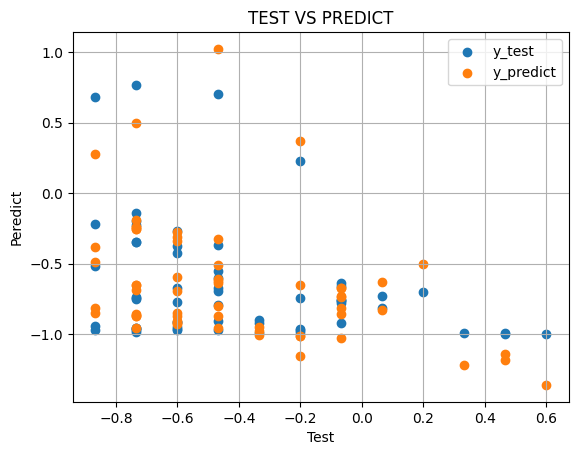

In [55]:
plt.title('TEST VS PREDICT')
plt.scatter(X_test.Age, y_test, label= 'y_test')
plt.scatter(X_test.Age, y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Peredict')
plt.legend()
plt.grid()
plt.show()


In [61]:
df

,Age,Age2,Age3,Selling_Price,Present_Price2,Present_Price3,Present_Price,Kms_Driven,Fuel_Type,Fuel_Type3,Kms_Driven2,Kms_Driven3,Seller_Type,Transmission,Transmission2,Transmission3,Owner,Owner2,Owner3
0,5,25,125,3.35,31.2481,174.676879,5.59,27000,1,1,729000000,19683000000000,0,0,0,0,0,0,0
1,6,36,216,4.75,91.0116,868.250664,9.54,43000,-1,-1,1849000000,79507000000000,0,0,0,0,0,0,0
2,2,4,8,7.25,97.0225,955.671625,9.85,6900,1,1,47610000,328509000000,0,0,0,0,0,0,0
3,8,64,512,2.85,17.2225,71.473375,4.15,5200,1,1,27040000,140608000000,0,0,0,0,0,0,0
4,5,25,125,4.60,47.1969,324.242703,6.87,42450,-1,-1,1802002500,76495006125000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,3,9,27,9.50,134.5600,1560.896000,11.60,33988,-1,-1,1155184144,39262398686272,0,0,0,0,0,0,0
297,4,16,64,4.00,34.8100,205.379000,5.90,60000,1,1,3600000000,216000000000000,0,0,0,0,0,0,0
298,10,100,1000,3.35,121.0000,1331.000000,11.00,87934,1,1,7732388356,679939837696504,0,0,0,0,0,0,0
299,2,4,8,11.50,156.2500,1953.125000,12.50,9000,-1,-1,81000000,729000000000,0,0,0,0,0,0,0


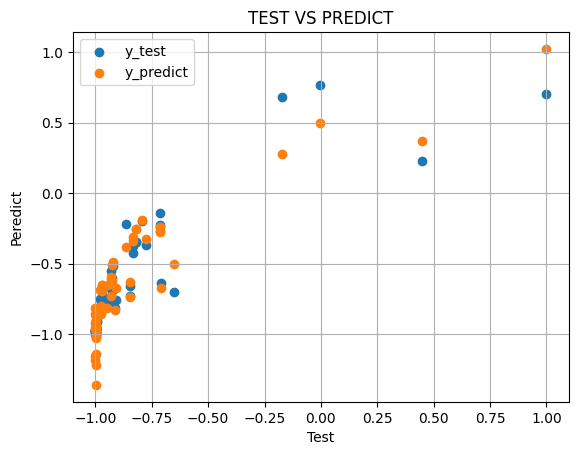

In [64]:
plt.title('TEST VS PREDICT')
plt.scatter(X_test['Present_Price'], y_test, label= 'y_test')
plt.scatter(X_test['Present_Price'], y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Peredict')
plt.legend()
plt.grid()
plt.show()

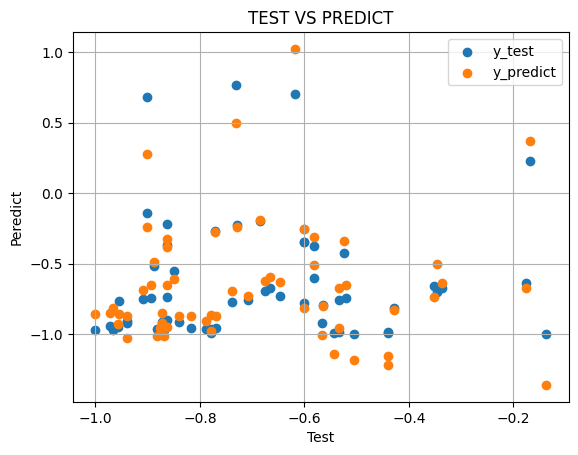

In [65]:
plt.title('TEST VS PREDICT')
plt.scatter(X_test['Kms_Driven'], y_test, label= 'y_test')
plt.scatter(X_test['Kms_Driven'], y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Peredict')
plt.legend()
plt.grid()
plt.show()

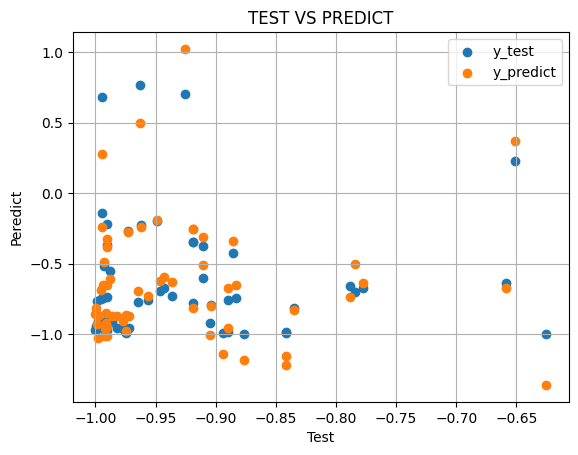

In [66]:
plt.title('TEST VS PREDICT')
plt.scatter(X_test['Fuel_Type'], y_test, label= 'y_test')
plt.scatter(X_test['Fuel_Type'], y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Peredict')
plt.legend()
plt.grid()
plt.show()

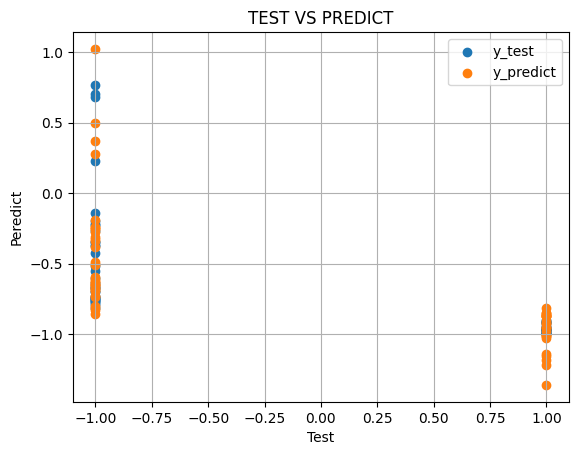

In [67]:
plt.title('TEST VS PREDICT')
plt.scatter(X_test['Seller_Type'], y_test, label= 'y_test')
plt.scatter(X_test['Seller_Type'], y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Peredict')
plt.legend()
plt.grid()
plt.show()

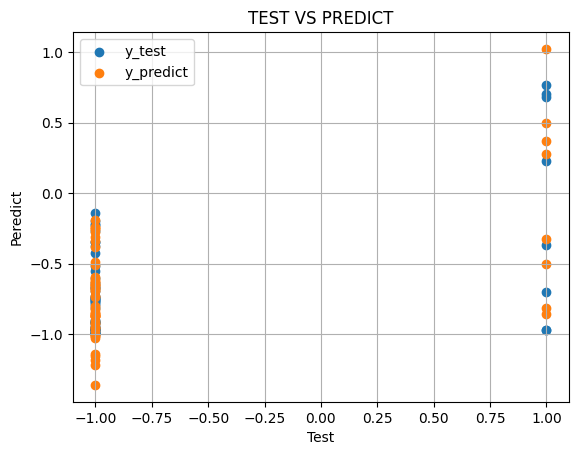

In [68]:
plt.title('TEST VS PREDICT')
plt.scatter(X_test['Transmission'], y_test, label= 'y_test')
plt.scatter(X_test['Transmission'], y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Peredict')
plt.legend()
plt.grid()
plt.show()

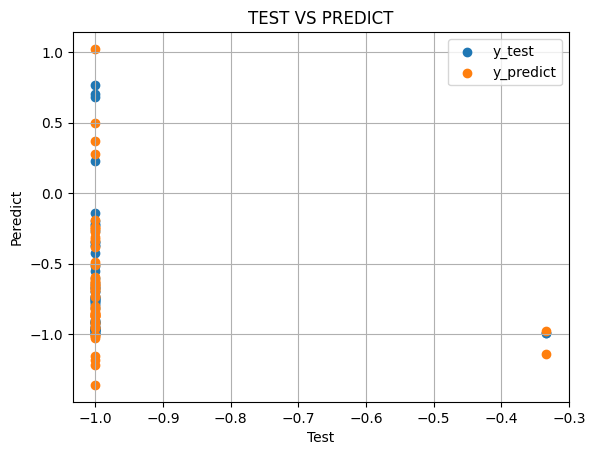

In [69]:
plt.title('TEST VS PREDICT')
plt.scatter(X_test['Owner'], y_test, label= 'y_test')
plt.scatter(X_test['Owner'], y_pred, label= 'y_predict')
plt.xlabel('Test')
plt.ylabel('Peredict')
plt.legend()
plt.grid()
plt.show()

In [56]:
model.coef_

array([[-0.12344647, -0.60798423,  0.68711827, -0.52098952,  0.44349591,
         0.97290717,  0.37886705, -0.03741316, -0.03741316, -2.46431235,
         2.08529874, -0.01925492,  0.00919952,  0.00919952,  0.00919952,
         0.07900685, -0.0983534 , -0.15747348]])

In [57]:
model.intercept_

array([-0.06804346])

In [58]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'R2_Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error: 0.09415762339493973
Mean Squared Error: 0.015618127722604128
Root Mean Squared Error: 0.12497250786714703
R2_Score: 0.9093941568206156


0.8716308876630393

R2_Score: 0.8716308876630394


R2_Score: 0.8888130022676632

R2_Score: 0.8992023025270444

R2_Score: 0.8992023025270444

R2_Score: 0.8993425772246553

R2_Score: 0.8992207217258459

R2_Score: 0.8970536063174896

R2_Score: 0.8971252656512385

In [59]:
# Year2 = df_new.Year ** 2
# Year3 = df_new.Year ** 3
# Age2 = df_new.Age ** 2
# Age3 = df_new. Age ** 3
# km2 = df_new.Kms_Driven	 ** 2
# km3 = df_new.Kms_Driven	 ** 3

In [60]:
# df.insert(1, 'Year2', Year2)
# df.insert(2, 'Year3', Year3)
# df.insert(3, 'Age2', Age2)
# df.insert(4, 'Age3', Age3)
# df.insert(8, 'Kms_Driven2', km2)
# df.insert(9, 'Kms_Driven3', km3)